# Лабораторная работа №1. EDA

In [311]:
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
sns.set_palette("Set2")

In [312]:
data = pd.read_csv("data_sets/neo_task.csv")

### Исследование исходных данных

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90266 non-null  float64
 1   name                90790 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90379 non-null  float64
 4   relative_velocity   90279 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   absolute_magnitude  90152 non-null  float64
 7   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(6), object(1)
memory usage: 4.9+ MB



### Датасет содержит следующие поля:
* `id` - идентификатор
* `name` - название
* `est_diameter_min` - минимальный расчетный диаметр
* `est_diameter_max` - максимальный расчетный диаметр
* `relative_velocity` - относительная скорость
* `miss_distance` - дистанция пролета / минимальная дистанция
* `absolute_magnitude` - абсолютная звездная величина
* `hazardous` - опасность




In [314]:
data.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.026600e+04,90836.000000,90379.000000,90279.000000,9.083600e+04,90152.000000
mean,1.438528e+07,0.127432,0.284911,48066.003701,3.706655e+07,23.526653
std,2.087357e+07,0.298511,0.668148,25294.523635,2.235204e+07,2.893982
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448595e+06,0.019256,0.043057,28620.469765,1.721082e+07,21.340000
50%,3.748364e+06,0.048368,0.108153,44190.108201,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62931.850541,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [315]:
data.head(35)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
5,3395961.0,(2007 WU3),0.046191,0.103286,18933.875801,2.847083e+07,23.80,False
6,3826808.0,(2018 PH22),0.116026,0.259442,43184.402732,3.418417e+07,21.80,False
7,3339667.0,(2006 QV89),0.021113,0.047211,38064.802287,2.653154e+07,25.50,False
8,3644044.0,(2013 LL31),0.221083,0.494356,33736.859964,5.670662e+07,20.40,False
9,3655750.0,(2014 AC16),0.242412,0.542051,56188.215588,6.175441e+07,20.20,False


In [316]:
data.duplicated().sum()

np.int64(0)


### Получили следующую характеристику исходных данных:
* в столбцах `absolute_magnitude`, `id`, `relative_velocity`, `est_diameter_max`, `name` есть пропуски
* неподходящий тип данных в столбце `id` - тип float необходимо изменить на тип int, так как идентификатор - целое число

### Обработка пропущенных значений и удаление дубликатов

In [317]:
data.drop_duplicates()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,3561024.0,(2011 GZ2),0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,54016766.0,(2020 HT6),0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,3746620.0,(2016 ED156),0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,3633054.0,(2013 FD8),0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,3742124.0,(2016 CW31),0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...,...,...
90831,54231436.0,(2021 YE),0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,3824972.0,(2018 KL),0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,3740101.0,(2016 AB166),0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,3691093.0,(2014 SQ260),0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


In [318]:
(data.isna().sum() / data.shape[0] * 100).sort_values(ascending=False)

absolute_magnitude    0.753005
id                    0.627505
relative_velocity     0.613193
est_diameter_max      0.503104
name                  0.050641
est_diameter_min      0.000000
miss_distance         0.000000
hazardous             0.000000
dtype: float64

##### Недостающие значение данных в следующих столбцах:
* `absolute_magnitude`
* `id`
* `relative_velocity`
* `est_diameter_max`
* `name`

In [319]:
data = data.drop(columns=["id", "name"])
# data = data.drop(columns=["id"])
data

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


### Предположения для заполнения пропущенных значений:
* Заполнить пропущенные значения в столбце `absolute_magnitude` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `relative_velocity` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `est_diameter_max` путем прибавления к `est_diameter_min` (среди которого нет пропусков) среднего значения отклонения `est_diameter_max` от `est_diameter_min`

In [320]:
# data["id"] = data["id"].fillna(data["id"].mode()[0])
data["absolute_magnitude"] = data["absolute_magnitude"].fillna(data["absolute_magnitude"].mean())
data["relative_velocity"] = data["relative_velocity"].fillna(data["relative_velocity"].mean())

mean_diameter_difference = data["est_diameter_max"].mean() - data["est_diameter_min"].mean()
data["est_diameter_max"] = data["est_diameter_max"].fillna(data["est_diameter_min"] + mean_diameter_difference)
# data["name"] = data["name"].fillna(data["name"].mode()[0])



In [321]:
data.isna().sum()

est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
absolute_magnitude    0
hazardous             0
dtype: int64

### Обогащение данных
Из столбца `name` можно извлечь информацию о годе наблюдения метеорита.

In [322]:
# data["year"] = data["name"].str.extract(r'\(.*?\b(\d{4})\b.*?\)')
# data["year"].value_counts()
# data = data.drop(columns=["name"])
# data

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  bool   
dtypes: bool(1), float64(5)
memory usage: 3.6 MB


Заполним пропуски в столбце с годом

In [324]:
# data["year"] = data["year"].fillna(data["year"].mode()[0])
# data["year"].isna().sum()

### Коррекция типов данных

In [325]:
# data["year"] = data["year"].astype(int)
# data.info()

data["hazardous"] = data["hazardous"].astype(int)

### Проверка очищенных данных

In [326]:
data.duplicated().sum()

np.int64(6)

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   absolute_magnitude  90836 non-null  float64
 5   hazardous           90836 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 4.2 MB


In [328]:
data.head()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0


### EDA

Исследование основных параметров

Параметры:

* `est_diameter_min` - минимальный расчетный диаметр
* `est_diameter_max` - максимальный расчетный диаметр
* `relative_velocity` - относительная скорость
* `miss_distance` - дистанция пролета / минимальная дистанция
* `absolute_magnitude` - абсолютная звездная величина
* `hazardous` - опасность


In [329]:
columns = ["est_diameter_min", "est_diameter_max", "relative_velocity", "miss_distance", "absolute_magnitude"]
data.describe()[columns]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284927,48066.003701,3.706655e+07,23.526653
std,0.298511,0.666670,25216.851401,2.235204e+07,2.883065
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28714.148508,1.721082e+07,21.380000
50%,0.048368,0.108153,44393.572744,3.784658e+07,23.700000
75%,0.143402,0.320656,62804.910500,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


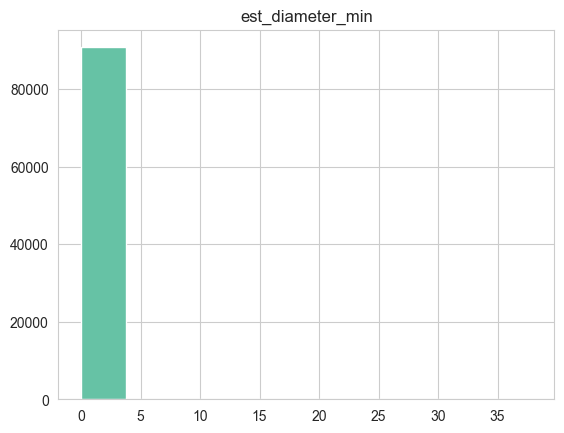

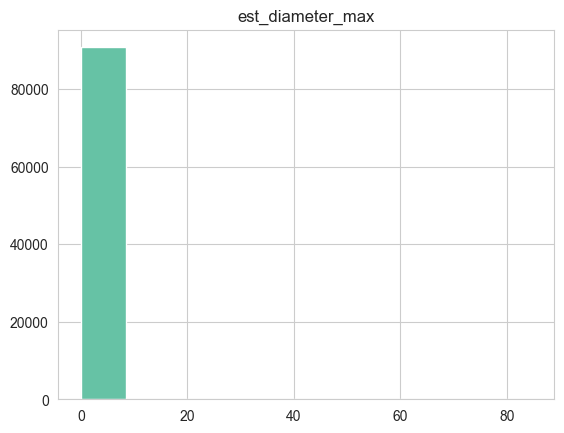

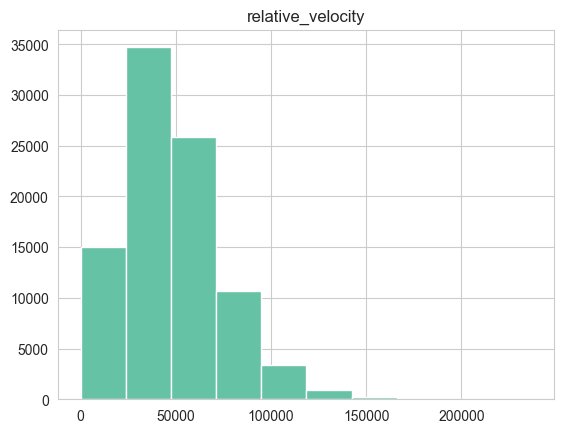

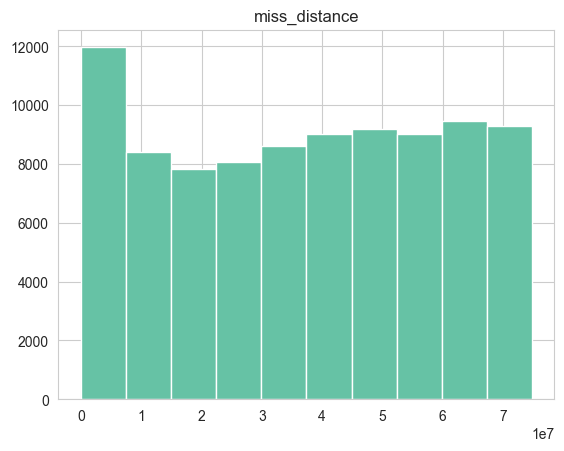

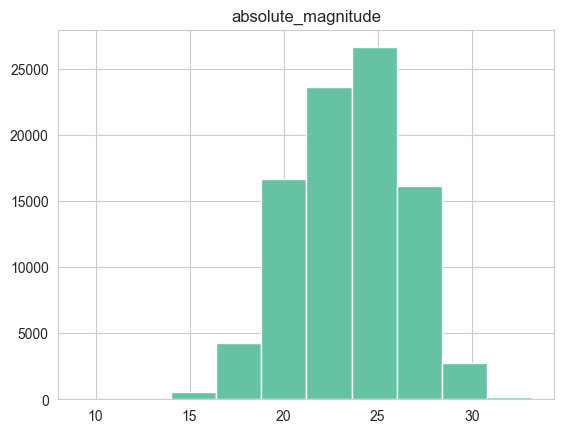

In [330]:
for column in columns:
    data.hist(column)


##### Заключение:
* Выбросы затрудняют чтение данных об относительной скорости, минимальном и максимальном диаметрах и дате
* На гистограмме данные относительной скорости смещены влево - это говорит о том, что среднее значение меньше медианы

### Изучение и обработка выбросов

In [331]:
outlier_columns = ["est_diameter_min", "est_diameter_max", "relative_velocity"]
outlier = data[outlier_columns]
outlier

,est_diameter_min,est_diameter_max,relative_velocity
0,0.016016,0.035813,56014.078517
1,0.030518,0.068240,7864.348060
2,0.055533,0.124177,55257.544508
3,0.019256,0.043057,41531.404722
4,0.139494,0.311918,67639.394481
...,...,...,...
90831,0.017561,0.039268,23264.740825
90832,0.110804,0.247765,24802.519406
90833,0.035039,0.078350,116288.999548
90834,0.044112,0.098637,45763.317060


Определим нижние и верхние пределы для выбросов

In [332]:
q1 = outlier.quantile(0.25)
q1

est_diameter_min         0.019256
est_diameter_max         0.043057
relative_velocity    28714.148508
Name: 0.25, dtype: float64

In [333]:
q3 = outlier.quantile(0.75)
q3

est_diameter_min         0.143402
est_diameter_max         0.320656
relative_velocity    62804.910500
Name: 0.75, dtype: float64

In [334]:
iqr = q3 - q1
data_filtered = outlier[((outlier >= (q1 - 1.5 * iqr)) & (outlier <= (q3 + 1.5 * iqr))).all(axis=1)]
data_filtered

,est_diameter_min,est_diameter_max,relative_velocity
0,0.016016,0.035813,56014.078517
1,0.030518,0.068240,7864.348060
2,0.055533,0.124177,55257.544508
3,0.019256,0.043057,41531.404722
4,0.139494,0.311918,67639.394481
...,...,...,...
90830,0.008405,0.018795,8424.366481
90831,0.017561,0.039268,23264.740825
90832,0.110804,0.247765,24802.519406
90834,0.044112,0.098637,45763.317060


In [335]:
data_filtered = data[data.index.isin(data_filtered.index.values)]
data_filtered.head(15)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.1,0
1,0.030518,0.068240,7864.348060,3.268186e+07,24.7,0
2,0.055533,0.124177,55257.544508,6.538636e+07,23.4,0
3,0.019256,0.043057,41531.404722,1.260796e+07,25.7,0
4,0.139494,0.311918,67639.394481,7.130590e+07,21.4,0
5,0.046191,0.103286,18933.875801,2.847083e+07,23.8,0
6,0.116026,0.259442,43184.402732,3.418417e+07,21.8,0
7,0.021113,0.047211,38064.802287,2.653154e+07,25.5,0
8,0.221083,0.494356,33736.859964,5.670662e+07,20.4,0
9,0.242412,0.542051,56188.215588,6.175441e+07,20.2,0


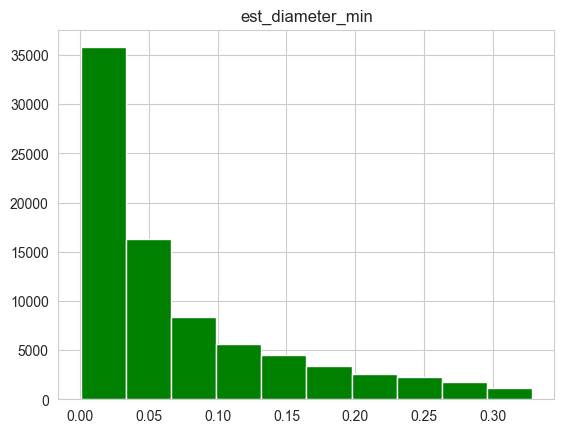

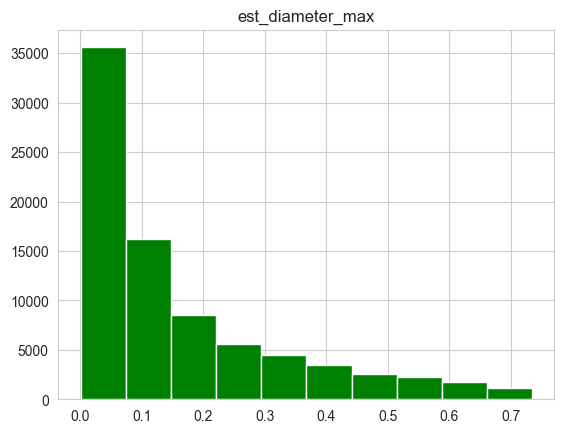

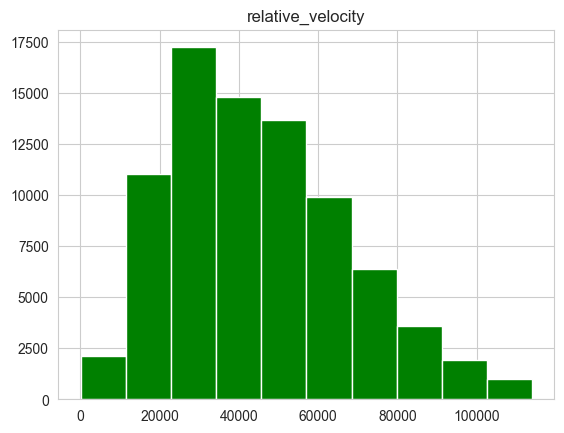

In [336]:
filtered_outlier = data[outlier_columns]
for column in filtered_outlier:
    data_filtered.hist(column, bins = 10, color="green")

### Заключение:

* Были определены нижний и верхний пределы выбросов, определив 25-й и 75-й процентили. С помощью межквартильного размаха были удалены выбросы.

* Судя по гистограмме минимального диаметра, большая часть этой величины распределена в диапазоне от 0 до 0.1.

* Судя по гистограмме максимального диаметра, большая часть этой величины распределена в диапазоне от 0 до 0.2.

* Судя по гистограмме значений столбца относительной скорости, большая часть этой величины распределена в диапазоне от 20000 до 60000.

* Судя по гистограмме значений года, большая часть опасных объектов наблюдалась в период с 2015 до 2020 года.

array([[<Axes: title={'center': 'est_diameter_max'}>]], dtype=object)

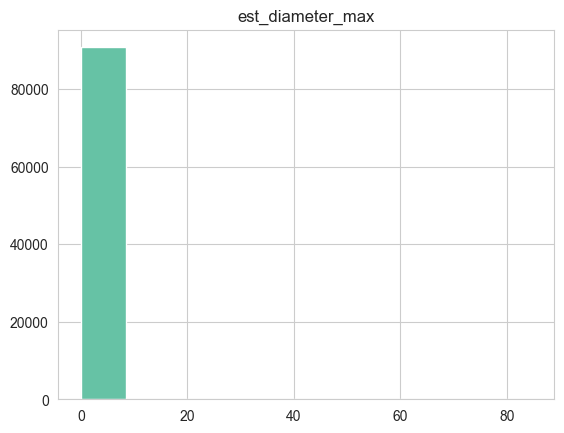

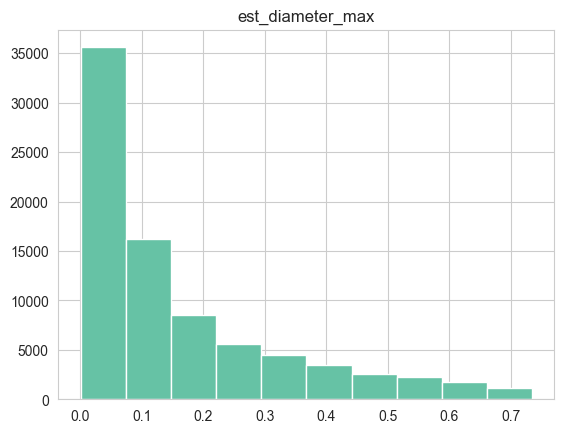

In [337]:
data.hist("est_diameter_max")
data_filtered.hist("est_diameter_max")

array([[<Axes: title={'center': 'est_diameter_min'}>]], dtype=object)

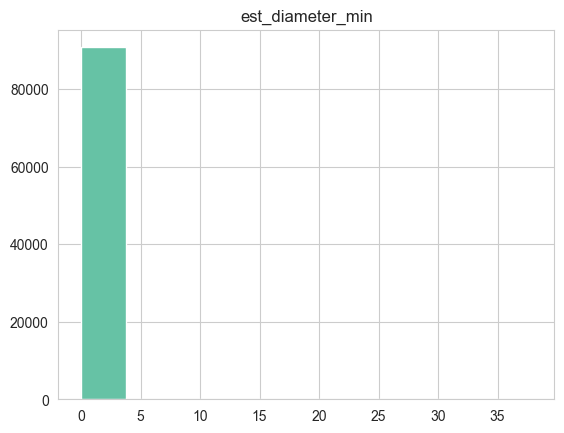

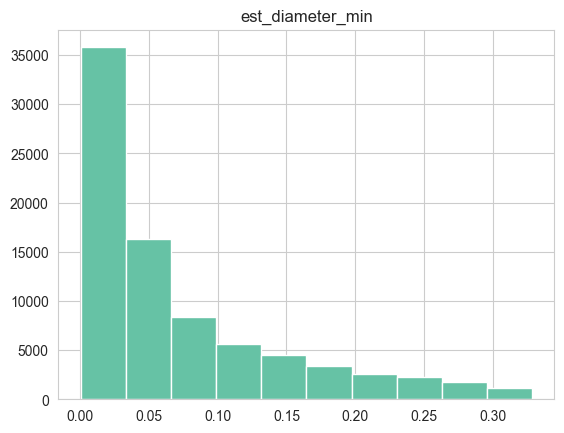

In [338]:
data.hist("est_diameter_min")
data_filtered.hist("est_diameter_min")

array([[<Axes: title={'center': 'relative_velocity'}>]], dtype=object)

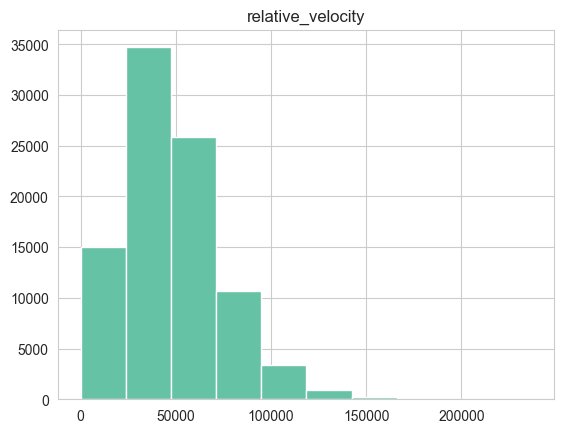

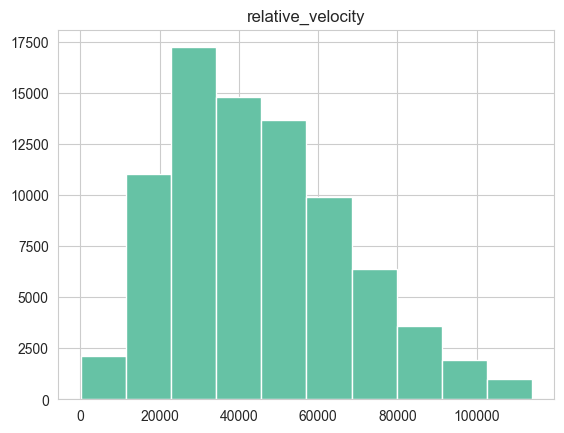

In [339]:
data.hist("relative_velocity")
data_filtered.hist("relative_velocity")

### Анализ статистических характеристик

In [340]:
data_filtered.describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
count,81631.000000,81631.000000,81631.000000,8.163100e+04,81631.000000,81631.000000
mean,0.071969,0.161265,45138.983674,3.581512e+07,24.071436,0.079002
std,0.075075,0.167572,22156.532701,2.242530e+07,2.461155,0.269743
min,0.000609,0.001362,203.346433,6.745533e+03,19.540000,0.000000
25%,0.017561,0.039268,27706.551950,1.550484e+07,22.100000,0.000000
50%,0.040230,0.089958,42240.810132,3.599820e+07,24.100000,0.000000
75%,0.101054,0.227007,59519.238674,5.525366e+07,25.900000,0.000000
max,0.328515,0.734581,113930.799284,7.479655e+07,33.200000,1.000000


### Анализ опасности

<Axes: xlabel='hazardous', ylabel='count'>

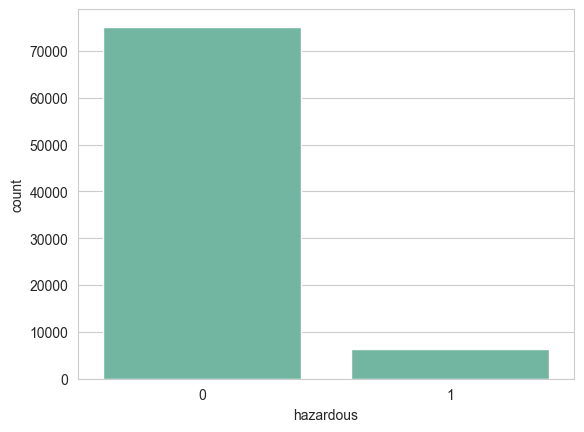

In [341]:
sns.countplot(data=data_filtered, x="hazardous")

График показывает, что большинство метеоритов являются неопасными

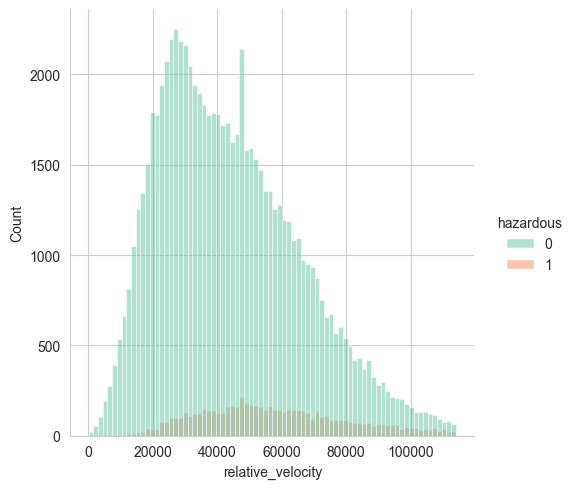

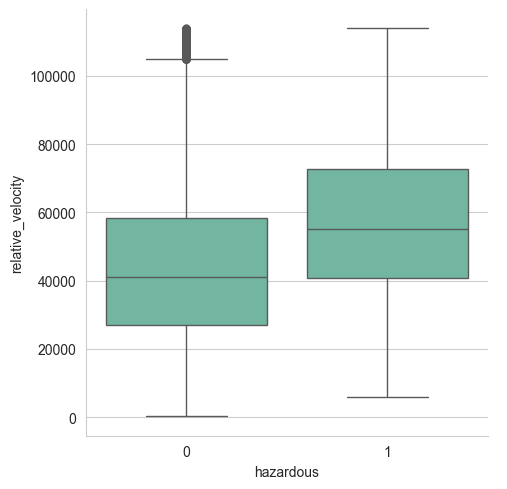

In [342]:
sns.displot(data_filtered, x="relative_velocity", hue="hazardous")
sns.catplot(data_filtered, x="hazardous", y="relative_velocity", kind="box")


### Заключение

* Медиана относительной скорости опасных астероидов больше (примерно 50000), чем у неопасных (примерно 40000).

* Относительная скорость опасных метеоритов лежит в диапазоне от 20000 до 100000, относительная скорость у неопасных метеоритов лежит в диапазоне от 0 до 100000.

* Нижний и верхний квартили относительной скорости опасных метеоритов превышает значения нижнего и верхнего квартиля для неопасных метеоритов.

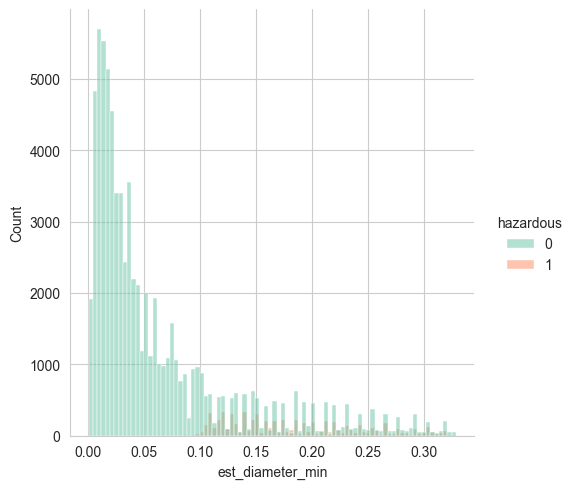

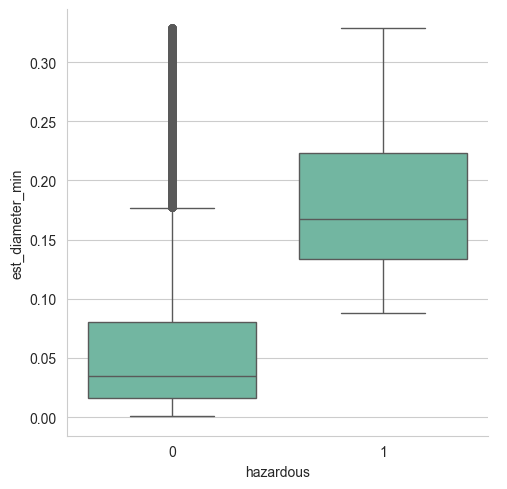

In [343]:
sns.displot(data_filtered, x="est_diameter_min", hue="hazardous")
sns.catplot(data_filtered, x="hazardous", y="est_diameter_min", kind="box")

### Заключение

* Медиана минимального диаметра для неопасных объектов принимает значение 0.04, а медиана минимального диаметра для опасных объектов 0.17.

* Нижний и верхний квартили минимального диаметра опасных метеоритов превышает значения нижнего и верхнего квартиля для неопасных метеоритов.

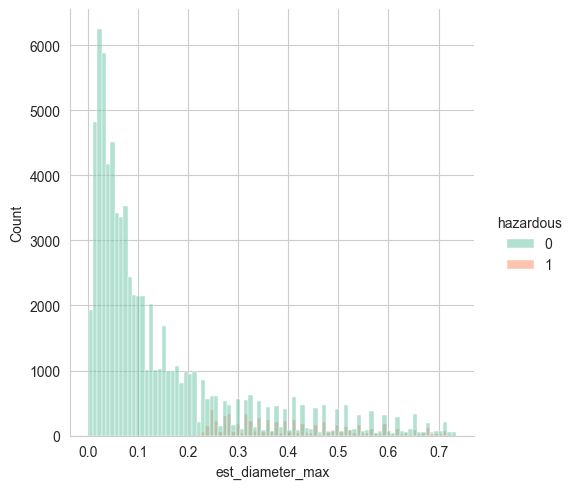

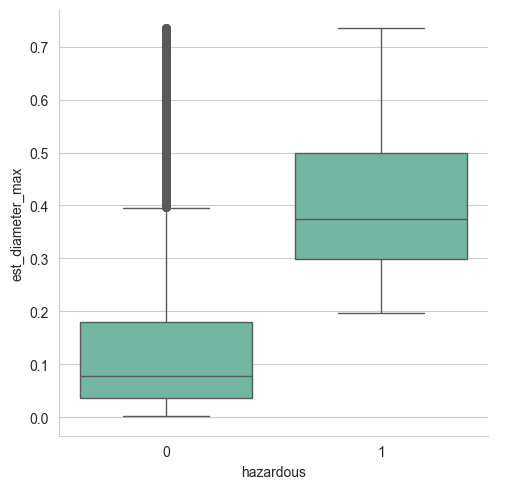

In [344]:
sns.displot(data_filtered, x="est_diameter_max", hue="hazardous")
sns.catplot(data_filtered, x="hazardous", y="est_diameter_max", kind="box")

### Заключение

* Медиана максимального диаметра для неопасных объектов принимает значение 0.09, а медиана минимального диаметра для опасных объектов 0.37.

* Нижний и верхний квартили максимального диаметра опасных метеоритов превышает значения нижнего и верхнего квартиля для неопасных метеоритов.

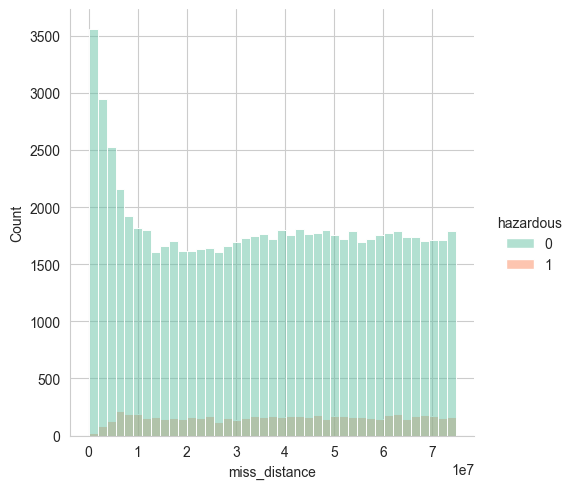

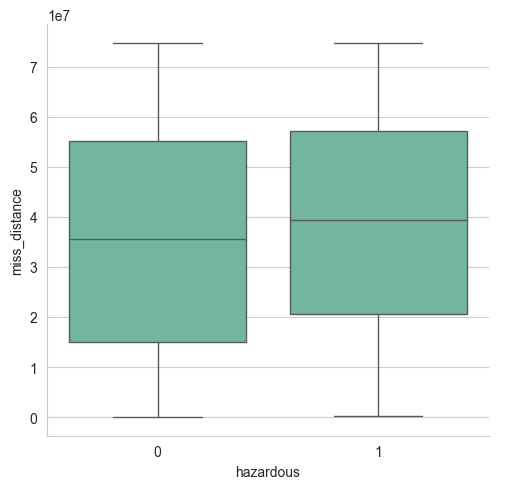

In [345]:
sns.displot(data_filtered, x="miss_distance", hue="hazardous")
sns.catplot(data_filtered, x="hazardous", y="miss_distance", kind="box")

### Заключение

* Дистанция пролета для опасных и неопасных объектов лежит в одинаковых пределах от 0 до 7.

* Медиана дистанции пролета для неопасных объектов составляет примерно 3.5, а для опасных - 3.9.

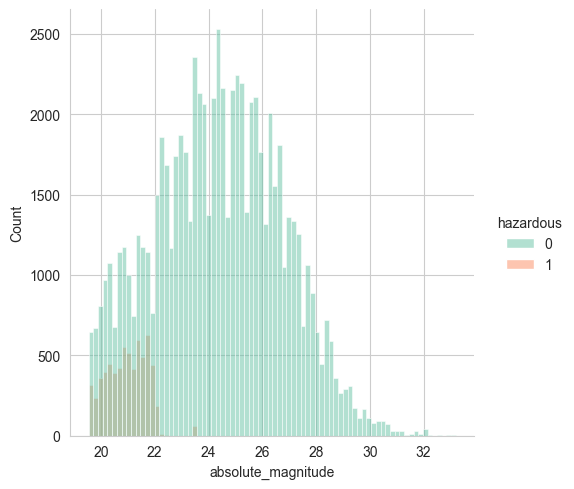

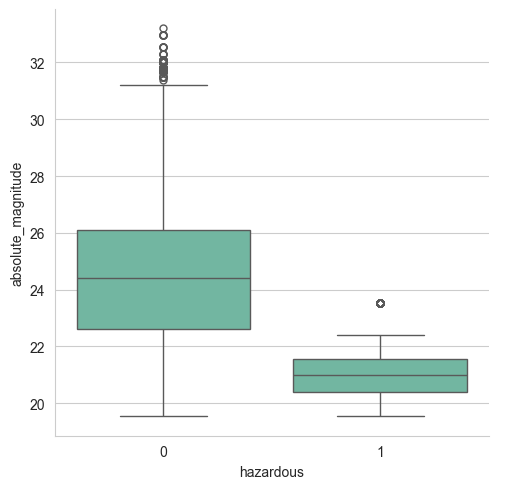

In [346]:
sns.displot(data_filtered, x="absolute_magnitude", hue="hazardous")
sns.catplot(data_filtered, x="hazardous", y="absolute_magnitude", kind="box")

### Заключение

* Абсолютная магнитуда для опасных объектов лежит в диапазоне от 20 до 22

* Абсолютная магнитуда для неопасных объектов лежит в диапазоне от 20 до 32.

* Квартили абсолютной магнитуды для опасных объектов меньше, чем квартили для опасных объектов.

In [350]:
correlations = data_filtered.corr(numeric_only=True)['hazardous']
correlations

est_diameter_min      0.431499
est_diameter_max      0.431195
relative_velocity     0.165626
miss_distance         0.039938
absolute_magnitude   -0.371298
hazardous             1.000000
Name: hazardous, dtype: float64

### Итоговое заключение:

Проект призван создан для выявления признаков, влияющих на опасность космических объектов.

После загрузки необходимых библиотек и данных на экран было выведено общее резюме для их анализа. Затем была выполнена проверка на наличие дубликатов и пропусков данных. Данные были пропущены в столбцах `absolute_magnitude`, `id`, `relative_velocity`, `est_diameter_max`, `name`.

Данные столбцов `id` и `name` были удалены, а пропущенные значения для остальных столбцов были заполнены по следующим правилам:

* Заполнить пропущенные значения в столбце `absolute_magnitude` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `relative_velocity` средним значением по данному столбцу
* Заполнить пропущенные значения в столбце `est_diameter_max` путем прибавления к `est_diameter_min` (среди которого нет пропусков) среднего значения отклонения `est_diameter_max` от `est_diameter_min`

Изменение типа данных:
В рамках редактуры данных была проведена проверка на дублированные данные и их удаление, тип столбца `hazardous` был изменен с bool на int.





